# Imports and consts

In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from eda_utils.plotting import plot_cat_counts, plot_temporal_distribution

In [3]:
DATA_PATH = 'Data/'
FILE_NAME = 'riskified_ds_home_task_dataset_(3).csv'

In [20]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 50)

# Load and Explore Data

## Load

In [4]:
raw_df = pd.read_csv(f'{DATA_PATH}{FILE_NAME}', parse_dates=['created_at'])
raw_df.shape

C:\Users\uvors\AppData\Local\Temp\ipykernel_9472\4229271681.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(f'{DATA_PATH}{FILE_NAME}', parse_dates=['created_at'])


(190000, 21)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190000 entries, 0 to 189999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 190000 non-null  int64         
 1   status                   190000 non-null  object        
 2   email_anoni              190000 non-null  object        
 3   billing_country_code     189223 non-null  object        
 4   shipping_country_code    189721 non-null  object        
 5   shipping_method          185461 non-null  object        
 6   created_at               190000 non-null  datetime64[ns]
 7   total_spent              190000 non-null  float64       
 8   currency_code            190000 non-null  object        
 9   gateway                  189862 non-null  object        
 10  V1_link                  189993 non-null  object        
 11  V2_distance              157964 non-null  float64       
 12  V3_distance     

In [21]:
raw_df.head()

,order_id,status,email_anoni,billing_country_code,shipping_country_code,shipping_method,created_at,total_spent,currency_code,gateway,V1_link,V2_distance,V3_distance,V4_our_age,V5_merchant_age,V6_avs_result,V7_bill_ship_name_match,V8_ip,V9_cookie,V10_cookie,V11_cookie
0,176079577,approved,shRbsUOPGM@qq.com,CA,CA,value_1620,2017-04-06,758.471274,CAD,value_100,False,NaN,NaN,618.0,1.0,Unsupported,FL,0.0,0.0,3.767404,NaN
1,201560820,approved,hEjasTK8Vpq6sR@gmail.com,IT,IT,value_1639,2017-06-16,48.319175,EUR,value_169,False,2.0,2.0,0.0,0.0,Missing,FL,0.0,0.0,0.464798,NaN
2,164072492,approved,KOWpxkDYDF@gmail.com,BE,BE,value_244,2017-03-01,1123.094534,EUR,value_151,False,107.0,92.0,1149.0,1437.0,Missing,FL,0.0,1.0,1.258080,0.038704
3,174595495,approved,hKOMNS3@me.com,CH,CH,value_1879,2017-04-02,12.530000,USD,value_247,False,1.0,1.0,169.0,72.0,Missing,FL,0.0,10.0,0.481779,0.008171
4,213517818,approved,PrP6SYm5Q5nMs1tj@hotmail.com,HK,HK,value_291,2017-07-11,480.000000,USD,value_148,False,1.0,1.0,806.0,519.0,Unsupported,FL,0.0,211.0,1.475766,96.343843


## Destributions

### Numerical

In [6]:
raw_df.describe()

,order_id,created_at,total_spent,V2_distance,V3_distance,V4_our_age,V5_merchant_age,V8_ip,V9_cookie,V10_cookie,V11_cookie
count,1.900000e+05,190000,190000.000000,157964.000000,158957.000000,189993.000000,189993.000000,185132.000000,189816.000000,188148.000000,111295.000000
mean,1.589366e+08,2017-02-14 02:06:19.553684480,262.806693,1176.859443,1262.328208,653.947451,216.220645,0.076579,82.207796,5.305185,47.386270
min,2.179327e+07,2015-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,-323.000000,0.000000,0.000000,0.000000,-140.884769
25%,1.319893e+08,2016-11-30 00:00:00,77.400000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.631284,0.016134
50%,1.576925e+08,2017-02-09 00:00:00,140.400000,13.000000,13.000000,51.000000,1.000000,0.000000,4.000000,1.533317,1.773900
75%,1.871457e+08,2017-05-06 00:00:00,267.000000,174.000000,198.000000,692.000000,82.000000,0.000000,18.000000,4.443918,36.878183
max,2.160862e+08,2017-07-18 00:00:00,57746.005396,19610.000000,19610.000000,730603.000000,736666.000000,4.000000,24260.000000,100.000000,1181.605035
std,3.234140e+07,NaN,497.157831,3088.102927,3206.620899,2046.051781,6976.480661,0.387298,589.419776,9.227724,114.170882


Ovservations:
1. Total spend has 0 - Declined?
2. Our age - at least 25% are 0. NaN equivilant?
3. Mechant age has negative values. 50% are <=1
4. V8_ip looks categorical
5. Suspected outliers of extreme values - all but v8_ip

In [7]:
ORDINAL_CAT_COLS = ['V8_ip']

### str/cat

In [8]:
raw_df.select_dtypes(include=['object','category']).describe()

,status,email_anoni,billing_country_code,shipping_country_code,shipping_method,currency_code,gateway,V1_link,V6_avs_result,V7_bill_ship_name_match
count,190000,190000,189223,189721,185461,190000,189862,189993,189993,189993
unique,3,189946,213,195,2367,35,255,2,7,4
top,approved,NA@personal_domain.com,US,US,value_1645,USD,value_65,False,Unsupported,FL
freq,165441,30,65900,71482,20896,124681,28344,188851,68569,167300


Observations:
1. Most common email is the NA - i.e. this is not a specific. Would be interesting to see if there are other special values (out of scope).
2. billing_country_code, shipping_country_code both have ~200 uniques so maybe aggregate somehow. Also gateway.
2. Shipping method has 2367 nunique so consider how to handle - maybe one-hot is not so good.
3. V1_link looks boolean so check why it's object - probably NaNs.
4. Look at 'V6_avs_result' and see if unsupported is a special value. Either way it has 7 uniques.

In [41]:
STR_CAT_COLS = ['status', 'V6_avs_result', 'V7_bill_ship_name_match'] # To be one-hot encoded
STR_CAT_COLS_LARGE_NUNIQUE = ['billing_country_code', 'shipping_country_code', 'shipping_method', 'gateway', 'currency_code'] # To be label encoded

#### Value counts

##### Status

In [ ]:
raw_df['status'].value_counts(normalize=True, dropna=False)

status
approved      0.870742
declined      0.105263
chargeback    0.023995
Name: proportion, dtype: float64

##### Country Codes

Scroll of death but good to gloss over

In [31]:
normalized_counts = pd.concat([
    raw_df[col].value_counts(normalize=True, dropna=False).rename(col)
    for col in ['billing_country_code', 'shipping_country_code']
], axis=1)
display(normalized_counts)

billing_country_code     0.004089
shipping_country_code    0.001468
Name: nan, dtype: float64

,billing_country_code,shipping_country_code
US,0.346842,0.376221
CA,0.099905,0.095132
GB,0.058163,0.058984
AU,0.056763,0.056900
FR,0.044895,0.045884
JP,0.036305,0.036121
DE,0.033068,0.033579
CN,0.023016,0.017537
BR,0.022605,0.021000
IT,0.019579,0.019937


In [32]:
COUNTRY_CODE_OUTLIERS = ['Croatia (Local Name: Hrvatska)', 'Aaland Islands', '? string:IT ?', np.NaN]

##### shipping_method

In [33]:
raw_df['shipping_method'].value_counts(normalize=True, dropna=False)

shipping_method
value_1645    0.109979
value_1938    0.083489
value_291     0.074132
value_1059    0.055958
value_522     0.039800
                ...   
value_824     0.000005
value_2030    0.000005
value_385     0.000005
value_2003    0.000005
value_2093    0.000005
Name: proportion, Length: 2368, dtype: float64

##### gateway

Scroll of death but good to gloss over

In [34]:
raw_df['gateway'].value_counts(normalize=True, dropna=False)

gateway
value_65     0.149179
value_21     0.129474
value_169    0.120679
value_4      0.077095
value_196    0.075816
value_245    0.063479
value_181    0.045458
value_148    0.027874
value_43     0.024132
value_172    0.019226
value_201    0.017521
value_131    0.015463
value_202    0.014542
value_136    0.012132
value_99     0.011542
value_247    0.009400
value_177    0.009211
value_182    0.008811
value_119    0.008074
value_100    0.007689
value_120    0.007611
value_88     0.007279
value_96     0.007205
value_22     0.007195
value_167    0.006837
value_98     0.006453
value_121    0.006021
value_47     0.005384
value_20     0.005021
value_54     0.004811
value_242    0.004589
value_11     0.003947
value_126    0.003895
value_53     0.003611
value_180    0.002916
value_175    0.002753
value_87     0.002732
value_176    0.002463
value_40     0.002447
value_80     0.002379
value_44     0.002147
value_19     0.002132
value_25     0.002116
value_143    0.001979
value_187    0.001916
va

##### Curreny code

In [39]:
raw_df['currency_code'].value_counts(normalize=True, dropna=False)

currency_code
USD    0.656216
EUR    0.143979
GBP    0.062495
CAD    0.034174
JPY    0.029647
BRL    0.017858
TWD    0.013058
AUD    0.007068
DKK    0.004905
HKD    0.003995
KRW    0.003616
NOK    0.002979
SEK    0.002884
CHF    0.002816
SGD    0.002679
MYR    0.002353
THB    0.001647
PLN    0.001311
IDR    0.001268
MXN    0.000916
RUB    0.000658
NZD    0.000647
VND    0.000579
AED    0.000532
ARS    0.000453
CNY    0.000447
SAR    0.000421
ILS    0.000111
CZK    0.000095
PHP    0.000079
INR    0.000042
TRY    0.000032
ZAR    0.000026
HRK    0.000011
KES    0.000005
Name: proportion, dtype: float64

##### V1_link

In [43]:
raw_df['V1_link'].value_counts(normalize=True, dropna=False)

V1_link
False    0.993953
True     0.006011
NaN      0.000037
Name: proportion, dtype: float64

#### Visualize categorical

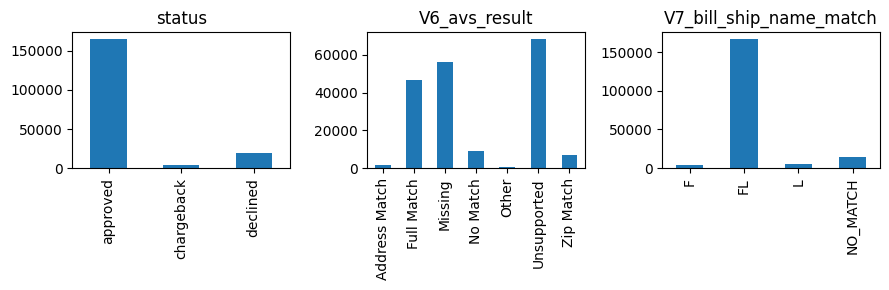

In [42]:
fig, axs = plot_cat_counts(raw_df, STR_CAT_COLS)

### date-time

#### Number of transtaction per month

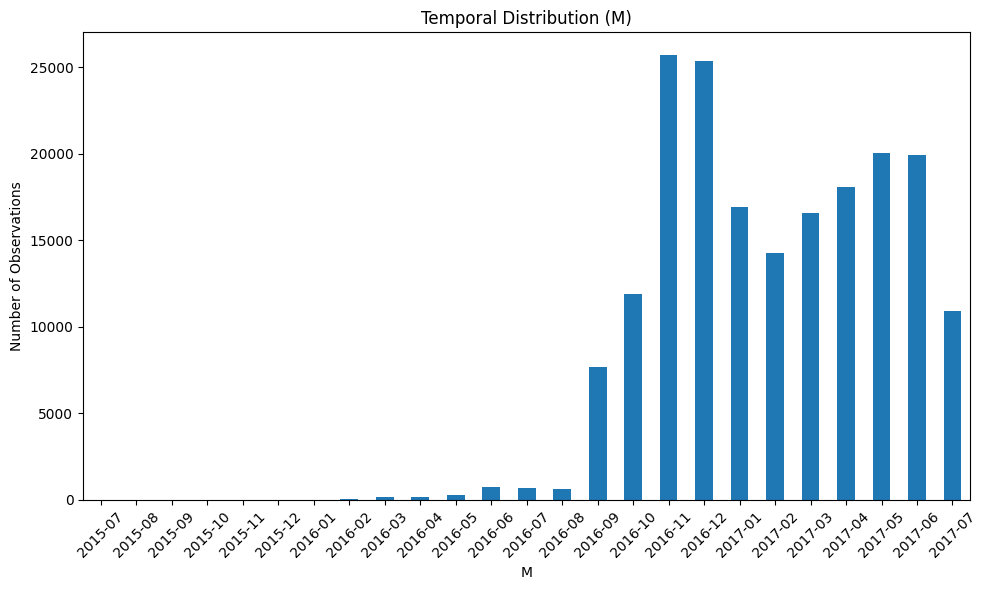

In [50]:
fig, ax = plot_temporal_distribution(raw_df['created_at'], freq='M', include_all_periods=True)

#### Number of transtaction per week

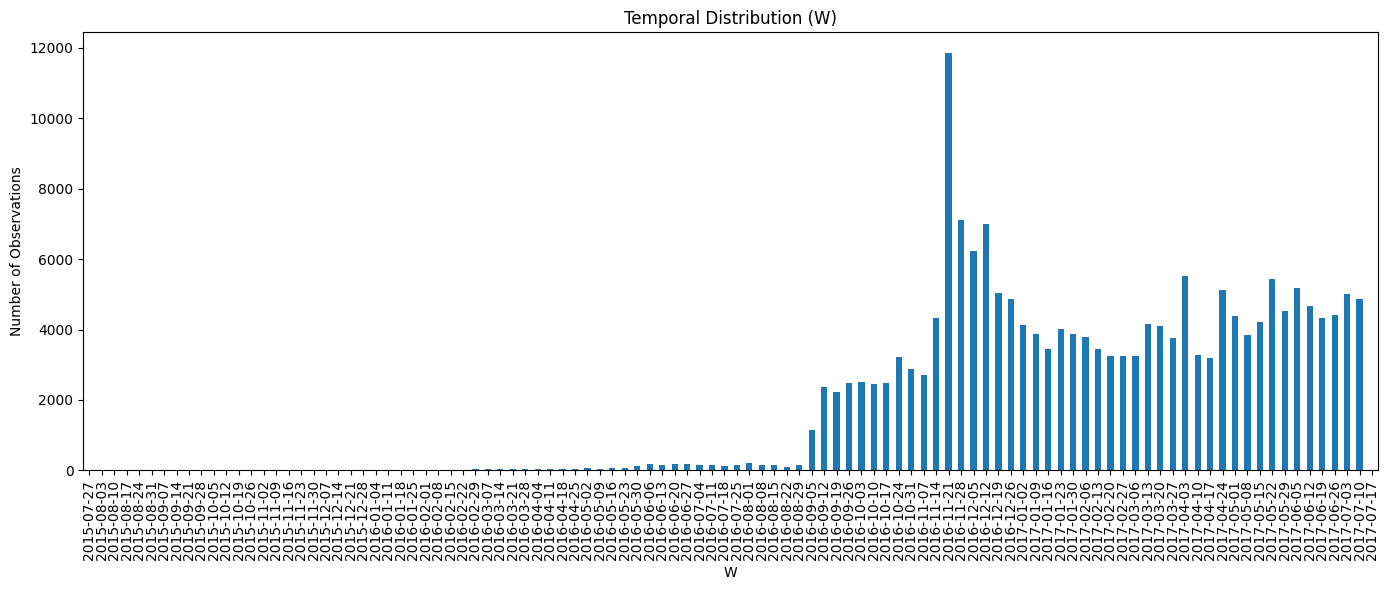

In [71]:
fig, ax = plot_temporal_distribution(raw_df['created_at'], freq='W', include_all_periods=True, figsize=(14, 6))

2016-11-21 has exceptionally large number of transactions